#

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

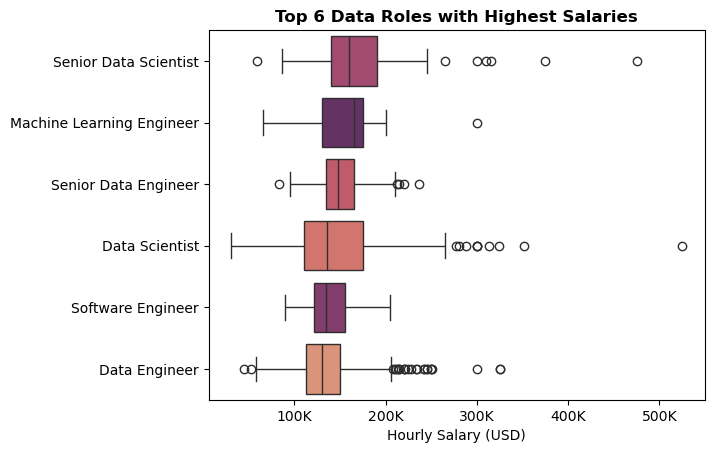

In [3]:
# Filter by country and location
df_us = df[(df["job_country"] == "United States")].dropna(subset="salary_year_avg").copy()
df_us["anywhere"] = df_us["job_location"] == "Anywhere"
# Filter the DataFrame by higher median yearly salaries
top_list = df_us.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).head(6).index.tolist()
df_any = df_us[(df_us["job_title_short"].isin(top_list)) & (df_us["anywhere"] == True)]

# Plotting
sns.boxplot(df_any, y="job_title_short", x="salary_year_avg", vert=False, palette="flare", hue="job_title_short", order=top_list)
plt.xlabel("Hourly Salary (USD)"), plt.ylabel(""), plt.title("Top 6 Data Roles with Highest Salaries", weight="bold")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()